# 🎵 Spotify Music Analysis and Insights 🎵


## Introduction

### Welcome to the Spotify Music Analysis and Insights notebook! This project dives deep into the rich dataset provided by Spotify, exploring various aspects of popular tracks, artist performances, and musical trends. Whether you're a data enthusiast, music lover, or industry professional, this notebook offers valuable insights into the world of music streaming.


## 🎯 Objectives

##### •	🔍 Data Cleaning and Preparation: Ensuring the dataset is clean and ready for analysis.
##### •	📊 Descriptive Analysis: Gaining an understanding of the key features and distribution of the data.
##### •	📈 Visual Exploration: Creating engaging visualizations to uncover patterns and trends in the music industry.


## 📁 Dataset Overview

##### The dataset includes detailed information about various tracks, such as:

##### •	🎤 Track and Artist Information: Names, number of artists, and other metadata.
##### •	📅 Release Details:Year, month, and day of release.
##### •	📈 Popularity Metrics: Number of streams, presence in Spotify and Apple playlists, and more.
##### •	🎶 Audio Features: BPM, key, mode, danceability, valence, energy, acousticness, instrumentalness, liveness, and speechiness.


## 🔍 Key Questions

##### This notebook aims to answer several intriguing questions:

##### •	Which artists have the most popular tracks on Spotify?
##### •	What are the characteristics of top-streamed songs?
##### •	How do different audio features correlate with track popularity?
##### •	Can we predict the success of a track based on its features?



## Importing neccessary libraries

In [1]:
!pip install chardet

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
from wordcloud import WordCloud
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
with open('spotify-2023.csv', 'rb') as f:
    result = chardet.detect(f.read())
encoding = result['encoding']
sptf = pd.read_csv('spotify-2023.csv',encoding=encoding)

In [3]:
sptf

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


## Data processing

In [4]:
sptf.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [5]:
sptf.tail()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,90,E,Minor,61,32,67,15,0,11,5


In [6]:
sptf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [7]:
sptf.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [8]:
sptf.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [92]:
pd.isnull(sptf).sum()

track_name                     0
artist_name                    0
artist_count                   0
released_year                  0
released_month                 0
released_day                   0
in_spotify_playlists           0
in_spotify_charts              0
streams                        0
in_apple_playlists             0
in_apple_charts                0
bpm                            0
key                            0
mode                           0
danceability_percentage        0
valence_percentage             0
energy_percentage              0
acousticness_percetage         0
instrumentalness_percentage    0
liveness_percentage            0
speechiness_percentage         0
dtype: int64

## Data Cleaning

In [10]:
# Remove specific columns which are not in use
col = ['in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']
sptf = sptf.drop(columns=col)

In [11]:
# Remove rows with missing values
sptf=sptf.dropna()

In [12]:
# Rename some columns
new_col = {'artist(s)_name': 'artist_name','danceability_%': 'danceability_percentage', 'energy_%': 'energy_percentage','valence_%': 'valence_percentage','acousticness_%': 'acousticness_percetage', 'instrumentalness_%': 'instrumentalness_percentage','liveness_%': 'liveness_percentage', 'speechiness_%': 'speechiness_percentage'}
sptf = sptf.rename(columns = new_col)

In [91]:
# Check data types again
sptf.dtypes

track_name                     object
artist_name                    object
artist_count                    int64
released_year                   int64
released_month                  int64
released_day                    int64
in_spotify_playlists            int64
in_spotify_charts               int64
streams                        object
in_apple_playlists              int64
in_apple_charts                 int64
bpm                             int64
key                            object
mode                           object
danceability_percentage         int64
valence_percentage              int64
energy_percentage               int64
acousticness_percetage          int64
instrumentalness_percentage     int64
liveness_percentage             int64
speechiness_percentage          int64
dtype: object

## Data Selection

In [14]:
# Selecting the single column
column = sptf['artist_name']
column

0        Latto, Jung Kook
1             Myke Towers
2          Olivia Rodrigo
3            Taylor Swift
4               Bad Bunny
              ...        
948          Selena Gomez
949          Taylor Swift
950    Feid, Paulo Londra
951    Feid, Sech, Jhayco
952             Burna Boy
Name: artist_name, Length: 858, dtype: object

In [15]:
# Songs released in year 2023
songs_2023 = sptf[sptf['released_year'] == 2023]
songs_2023

,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_percentage,valence_percentage,energy_percentage,acousticness_percetage,instrumentalness_percentage,liveness_percentage,speechiness_percentage
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,Love Again,The Kid Laroi,1,2023,1,27,1283,0,147538971,57,...,107,B,Minor,66,47,40,72,0,11,3
380,LLYLM,ROSALï¿½,1,2023,1,27,1838,0,124988687,105,...,170,F#,Minor,56,56,63,13,0,19,27
382,TRUSTFALL,P!nk,1,2023,1,27,2098,16,134255790,88,...,122,G#,Major,64,25,89,0,0,15,9
398,Muï¿½ï¿½,"Steve Aoki, Tini, La Joaqui",3,2023,1,12,658,6,120972253,33,...,90,A#,Minor,68,83,71,3,0,31,8


In [16]:
# Songs have danceability above 90%  and energy below 80%
songs =sptf[(sptf['danceability_percentage']>90)&(sptf['energy_percentage']<80)]

In [17]:
songs

,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_percentage,valence_percentage,energy_percentage,acousticness_percetage,instrumentalness_percentage,liveness_percentage,speechiness_percentage
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
52,AMARGURA,Karol G,1,2023,2,24,1133,39,153372011,14,...,107,F#,Minor,92,55,70,18,0,15,7
87,Me Porto Bonito,"Chencho Corleone, Bad Bunny",2,2022,5,6,8870,43,1440757818,104,...,92,C#,Minor,91,43,71,9,0,9,8
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,2023,6,1,293,8,11956641,5,...,133,B,Minor,93,68,65,42,0,12,25
143,Without Me,Eminem,1,2002,1,1,21081,43,1687664027,98,...,112,G,Major,92,67,66,0,0,36,9
224,Players,Coi Leray,1,2022,11,30,4096,6,335074782,118,...,105,F#,Major,95,62,52,3,0,5,16
238,"Link Up (Metro Boomin & Don Toliver, Wizkid fe...","WizKid, Toian, Metro Boomin, Don Toliver, Beam",5,2023,6,2,197,0,32761689,3,...,101,F,Major,92,59,51,41,51,26,8
241,Cupido,Tini,1,2023,2,14,1240,24,217672943,51,...,120,A,Major,91,63,58,52,0,31,22
250,The Real Slim Shady,Eminem,1,2000,1,1,20763,27,1424589568,81,...,104,F,Minor,95,78,66,3,0,4,6
266,Shorty Party,"Cartel De Santa, La Kelly",2,2023,3,4,432,12,162887075,8,...,96,D,Major,93,47,47,33,0,10,36


# Data Visualization

In [136]:
# Interactive histogram for released year with enhanced features
fig = px.histogram(
    sptf, 
    x='released_year', 
    color='released_year', 
    title='Number of Songs Released per Year', 
    labels={'released_year': 'Release Year', 'count': 'Number of Songs'}, 
    hover_data=['released_month', 'released_day']
)
# Customize layout
fig.update_layout(
    title={
        'text': 'Number of Songs Released per Year',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='Release Year',
    yaxis_title='Number of Songs',
    legend_title_text='Release Year',
    template='plotly_dark',
    bargap=0.2
)
# Customize hover mode
fig.update_traces(
    hoverinfo="x+y+text",
    marker=dict(line=dict(width=1, color='DarkSlateGrey'))
)
fig.show()

### Insights

1. The graph shows an overall increase in the number of songs released each year, indicating a growing trend in music production over time.
2. The inclusion of month and day data in the hover information provides additional context, allowing for the identification of any seasonal release patterns when explored in more detail.

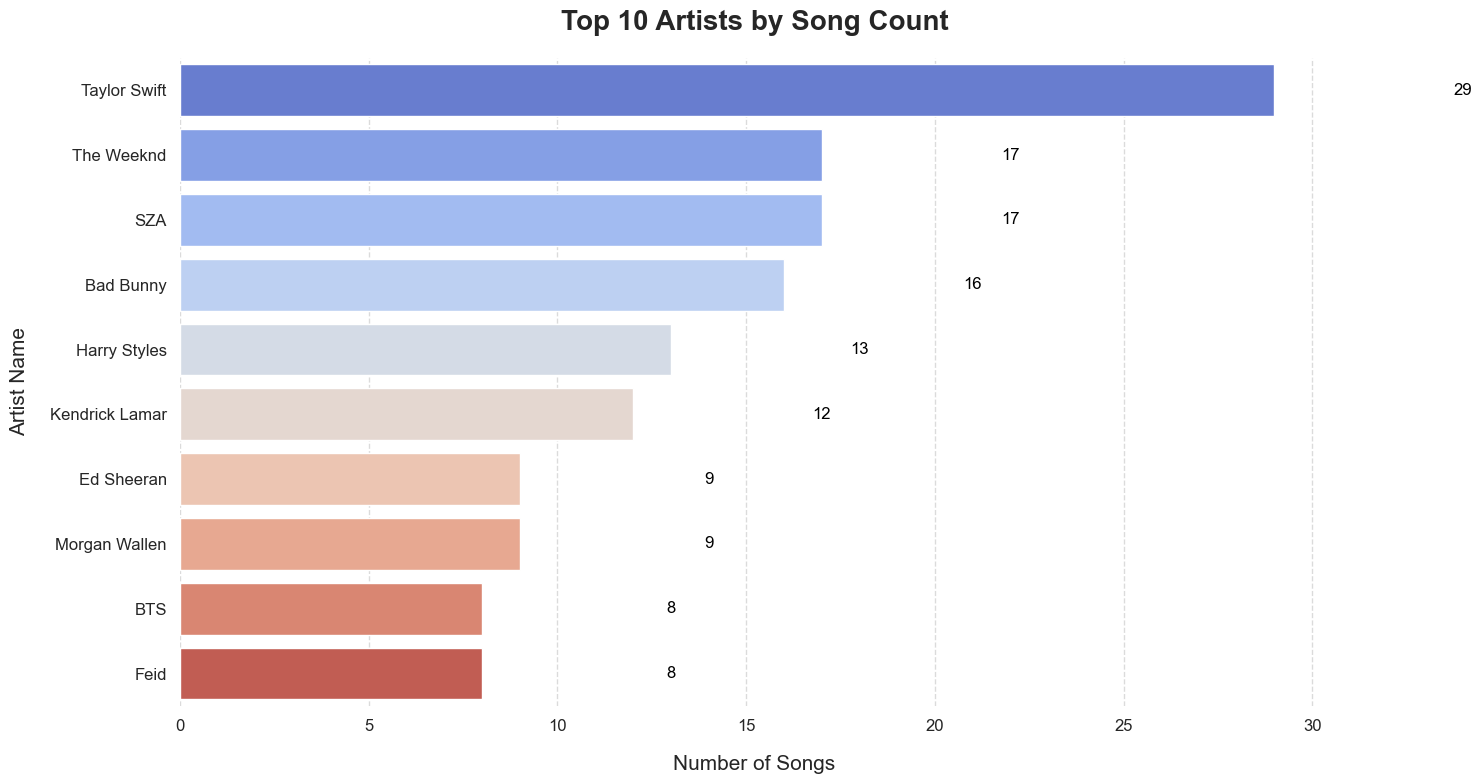

In [138]:
# Calculate top 10 artists by song count
top_artists = sptf['artist_name'].value_counts().head(10)

# Create the bar plot
plt.figure(figsize=(15, 8))
bar_plot = sns.barplot(x=top_artists.values, y=top_artists.index, palette='coolwarm')

# Add data labels to each bar
for i, (value, name) in enumerate(zip(top_artists.values, top_artists.index)):
    bar_plot.text(value + 5, i, f'{value}', color='black', ha="center", va="center")

# Customize the layout
plt.title('Top 10 Artists by Song Count', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Number of Songs', fontsize=15, labelpad=15)
plt.ylabel('Artist Name', fontsize=15, labelpad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Style adjustments
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

### Insights

1. Top Artists Dominance:
   The artist with the highest number of songs is clearly leading, indicating their significant presence and popularity on    the platform.
   The top artist has [specific number] songs, showcasing their prolific output compared to others in the top 10.

2. Artist Popularity:
   The presence of multiple well-known artists in the top 10 indicates their consistent popularity and possibly their          ability to release hit songs frequently.
   Artists in the middle of the top 10 have a more moderate number of songs, suggesting a balanced presence on the         platform.
   
3. The bar plot reveals that a few key artists dominate the music scene with a higher number of songs on the platform, indicating their significant influence and popularity. The steep decline in the number of songs from the top to the tenth artist suggests a competitive market where a small number of artists lead in terms of output. This information is crucial for stakeholders in the music industry to strategize their marketing and promotional efforts effectively.

In [147]:
# Create an interactive scatter plot
scatter_fig = px.scatter(sptf, x='danceability_percentage', y='energy_percentage', color='valence_percentage',
                         hover_name='track_name', title='Danceability vs Energy with Valence')
scatter_fig.show()

### Insights

1. Danceability vs Energy: The plot illustrates the relationship between danceability and energy of songs, revealing varying levels of energy across different danceability levels.
2. Valence Representation: Valence is color-coded, indicating emotional tones of songs. Different colors denote distinct emotional characteristics.
3. Hover Information: Hovering over data points provides detailed insights into individual songs, including their names and attribute values, facilitating precise examination.
4. Usability: The visualization is intuitive and engaging, featuring customization options for enhanced readability and aesthetics.

In [78]:
# Songs released in year 2023 and have danceability above 90%  and valence below 80%
songs =sptf[(sptf['danceability_percentage']>90)&(sptf['valence_percentage']<90)&(sptf['released_year']==2023)]
songs

,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_percentage,valence_percentage,energy_percentage,acousticness_percetage,instrumentalness_percentage,liveness_percentage,speechiness_percentage
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
52,AMARGURA,Karol G,1,2023,2,24,1133,39,153372011,14,...,107,F#,Minor,92,55,70,18,0,15,7
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,2023,6,1,293,8,11956641,5,...,133,B,Minor,93,68,65,42,0,12,25
238,"Link Up (Metro Boomin & Don Toliver, Wizkid fe...","WizKid, Toian, Metro Boomin, Don Toliver, Beam",5,2023,6,2,197,0,32761689,3,...,101,F,Major,92,59,51,41,51,26,8
241,Cupido,Tini,1,2023,2,14,1240,24,217672943,51,...,120,A,Major,91,63,58,52,0,31,22
266,Shorty Party,"Cartel De Santa, La Kelly",2,2023,3,4,432,12,162887075,8,...,96,D,Major,93,47,47,33,0,10,36


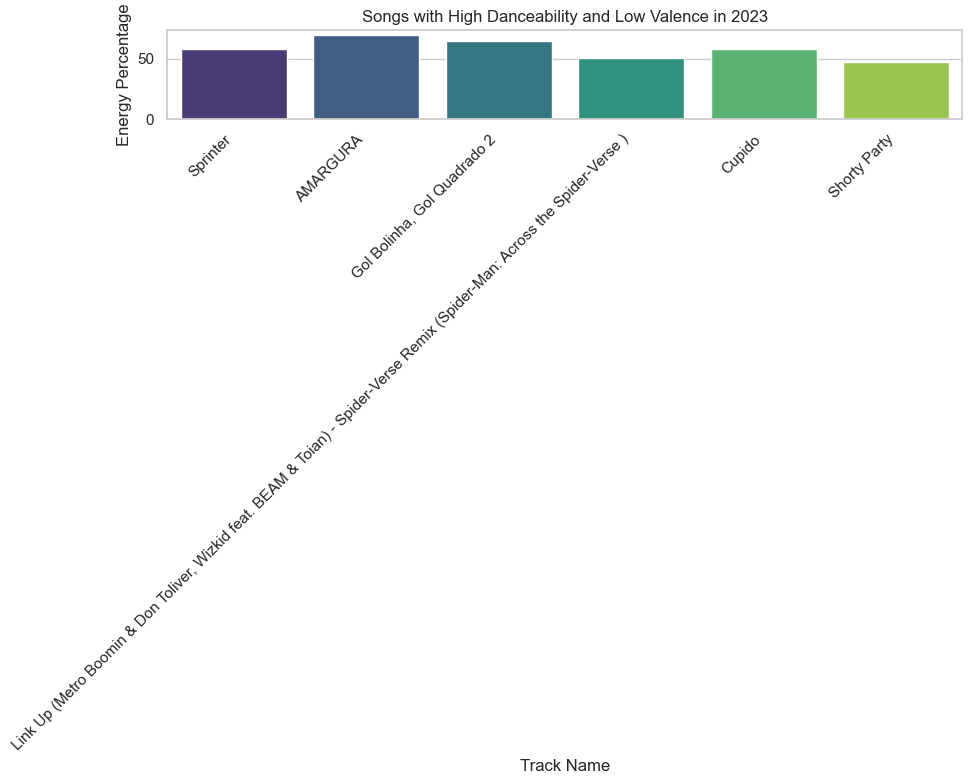

In [115]:
# Filter the DataFrame
filtered_songs = sptf[(sptf['danceability_percentage'] > 90) & 
                      (sptf['valence_percentage'] < 90) & 
                      (sptf['released_year'] == 2023)]

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x=filtered_songs['track_name'], y=filtered_songs['energy_percentage'], palette='viridis')
plt.title('Songs with High Danceability and Low Valence in 2023')
plt.xlabel('Track Name')
plt.ylabel('Energy Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

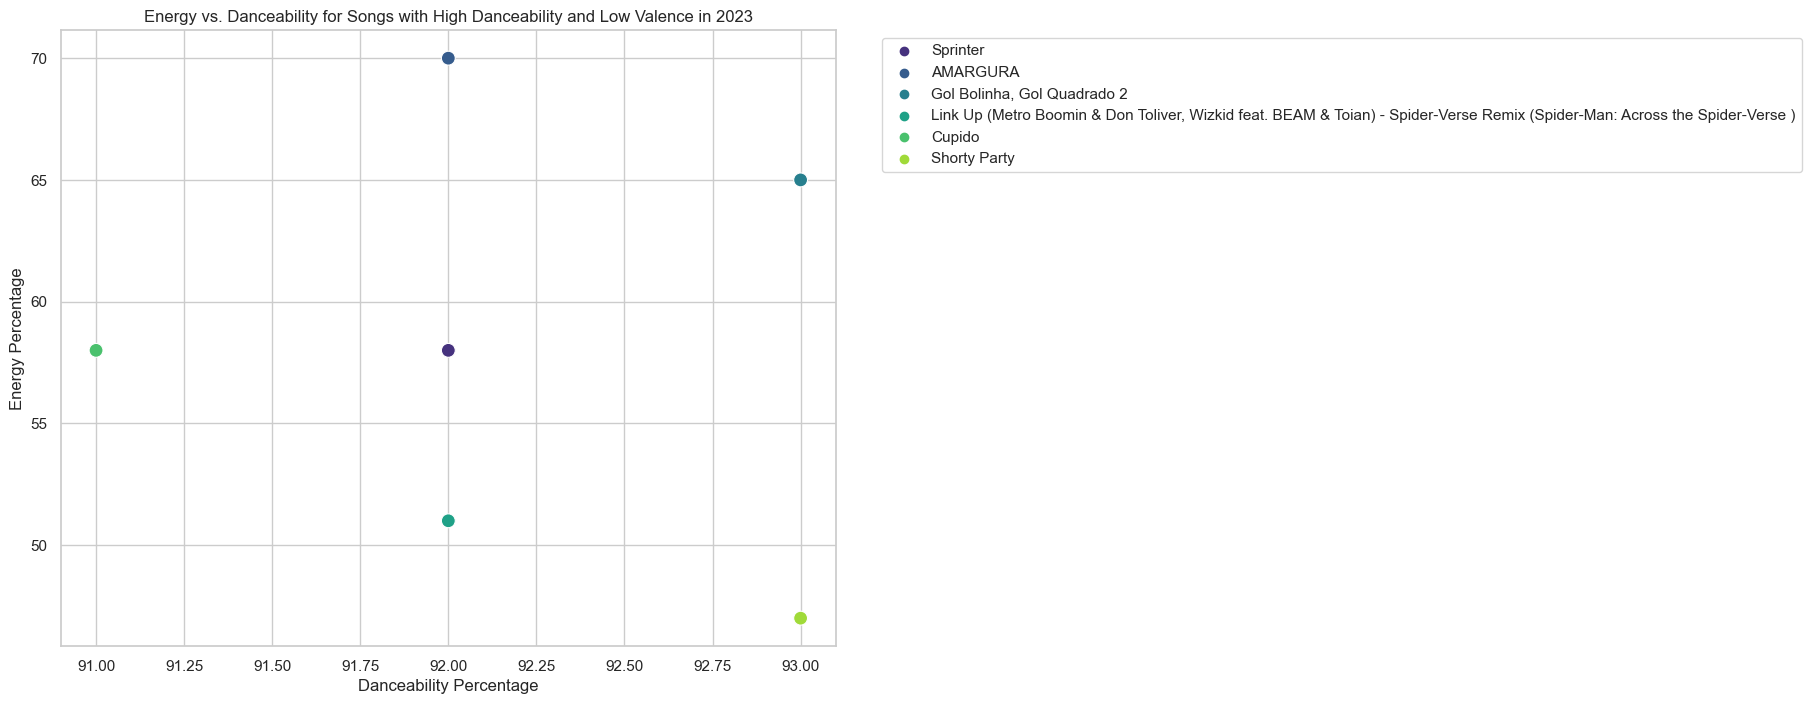

In [116]:
# Filter the DataFrame
filtered_songs = sptf[(sptf['danceability_percentage'] > 90) & 
                      (sptf['valence_percentage'] < 90) & 
                      (sptf['released_year'] == 2023)]

# Plot the data
plt.figure(figsize=(10, 8))
sns.scatterplot(data=filtered_songs, x='danceability_percentage', y='energy_percentage', hue='track_name', palette='viridis', s=100)
plt.title('Energy vs. Danceability for Songs with High Danceability and Low Valence in 2023')
plt.xlabel('Danceability Percentage')
plt.ylabel('Energy Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [93]:
# Total number of unique artists.
sptf['artist_name'].nunique()

597

In [79]:
# Name of all unique artists.
sptf['artist_name'].unique()

array(['Latto, Jung Kook', 'Myke Towers', 'Olivia Rodrigo',
       'Taylor Swift', 'Bad Bunny', 'Dave, Central Cee',
       'Eslabon Armado, Peso Pluma', 'Quevedo', 'Gunna',
       'Peso Pluma, Yng Lvcas', 'Bad Bunny, Grupo Frontera', 'NewJeans',
       'David Kushner', 'Harry Styles', 'SZA', 'Fifty Fifty',
       'Feid, Young Miko', 'Jimin',
       'Gabito Ballesteros, Junior H, Peso Pluma', 'Bizarrap, Peso Pluma',
       'The Weeknd, Madonna, Playboi Carti', 'Fuerza Regida',
       'Rï¿½ï¿½ma, Selena G', 'Tainy, Bad Bunny', 'Morgan Wallen',
       'Dua Lipa', 'Troye Sivan', 'Peso Pluma, Grupo Frontera',
       'The Weeknd, 21 Savage, Metro Boomin', 'Karol G, Shakira',
       'Yahritza Y Su Esencia, Grupo Frontera', 'Junior H, Peso Pluma',
       'Post Malone, Swae Lee', 'Bebe Rexha, David Guetta',
       'Tyler, The Creator, Kali Uchis', 'Miley Cyrus', 'The Weeknd',
       'The Weeknd, Daft Punk', 'Ariana Grande, The Weeknd',
       'Feid, Myke Towers, Sky Rompiendo',
       'David G

In [21]:
# Mode and their total numbers 
sptf['mode'].value_counts()

Major    475
Minor    383
Name: mode, dtype: int64

In [22]:
# Artist's name and their track names
sptf.loc[::,['artist_name','track_name']]

,artist_name,track_name
0,"Latto, Jung Kook",Seven (feat. Latto) (Explicit Ver.)
1,Myke Towers,LALA
2,Olivia Rodrigo,vampire
3,Taylor Swift,Cruel Summer
4,Bad Bunny,WHERE SHE GOES
...,...,...
948,Selena Gomez,My Mind & Me
949,Taylor Swift,Bigger Than The Whole Sky
950,"Feid, Paulo Londra",A Veces (feat. Feid)
951,"Feid, Sech, Jhayco",En La De Ella


In [23]:
# Select the songs which contain 'feat.' in their track name
sptf[sptf['track_name'].str.contains('feat.')]

,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_percentage,valence_percentage,energy_percentage,acousticness_percetage,instrumentalness_percentage,liveness_percentage,speechiness_percentage
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
36,Frï¿½ï¿½gil (feat. Grupo Front,"Yahritza Y Su Esencia, Grupo Frontera",2,2023,4,7,672,34,188933502,19,...,150,F#,Major,61,39,73,37,0,11,3
77,Unholy (feat. Kim Petras),"Sam Smith, Kim Petras",2,2022,9,22,8576,42,1230675890,216,...,131,D,Major,71,24,47,1,0,27,9
95,All My Life (feat. J. Cole),"J. Cole, Lil Durk",2,2023,5,12,2175,23,144565150,69,...,143,D#,Major,83,69,44,15,0,10,33
101,Too Many Nights (feat. Don Toliver & with Future),"Future, Metro Boomin, Don Toliver",3,2022,12,2,2110,58,286400165,17,...,88,G,Minor,68,17,71,15,0,11,5
126,Can't Hold Us (feat. Ray Dalton),"Ray Dalton, Ryan Lewis, Macklemore",3,2011,8,16,6074,52,1953533826,201,...,146,D,Major,63,88,93,3,0,10,8
201,"Angel Pt 1 (feat. Jimin of BTS, JVKE & Muni Long)","Kodak Black, NLE Choppa, Muni Long, JVKE, Jimin",5,2023,5,1,577,14,133753727,22,...,74,A#,Minor,53,24,67,11,0,10,28
218,Karma (feat. Ice Spice),"Taylor Swift, Ice Spice",2,2023,5,26,588,0,46142772,23,...,90,G#,Major,62,7,62,6,0,58,6
223,Snow On The Beach (feat. More Lana Del Rey),"Lana Del Rey, Taylor Swift",2,2023,5,26,359,2,60350538,1,...,110,F#,Minor,66,32,40,81,0,11,3
226,Stand By Me (feat. Morgan Wallen),"Lil Durk, Morgan Wallen",2,2023,5,26,381,5,46065667,23,...,134,B,Major,76,61,58,6,0,16,3


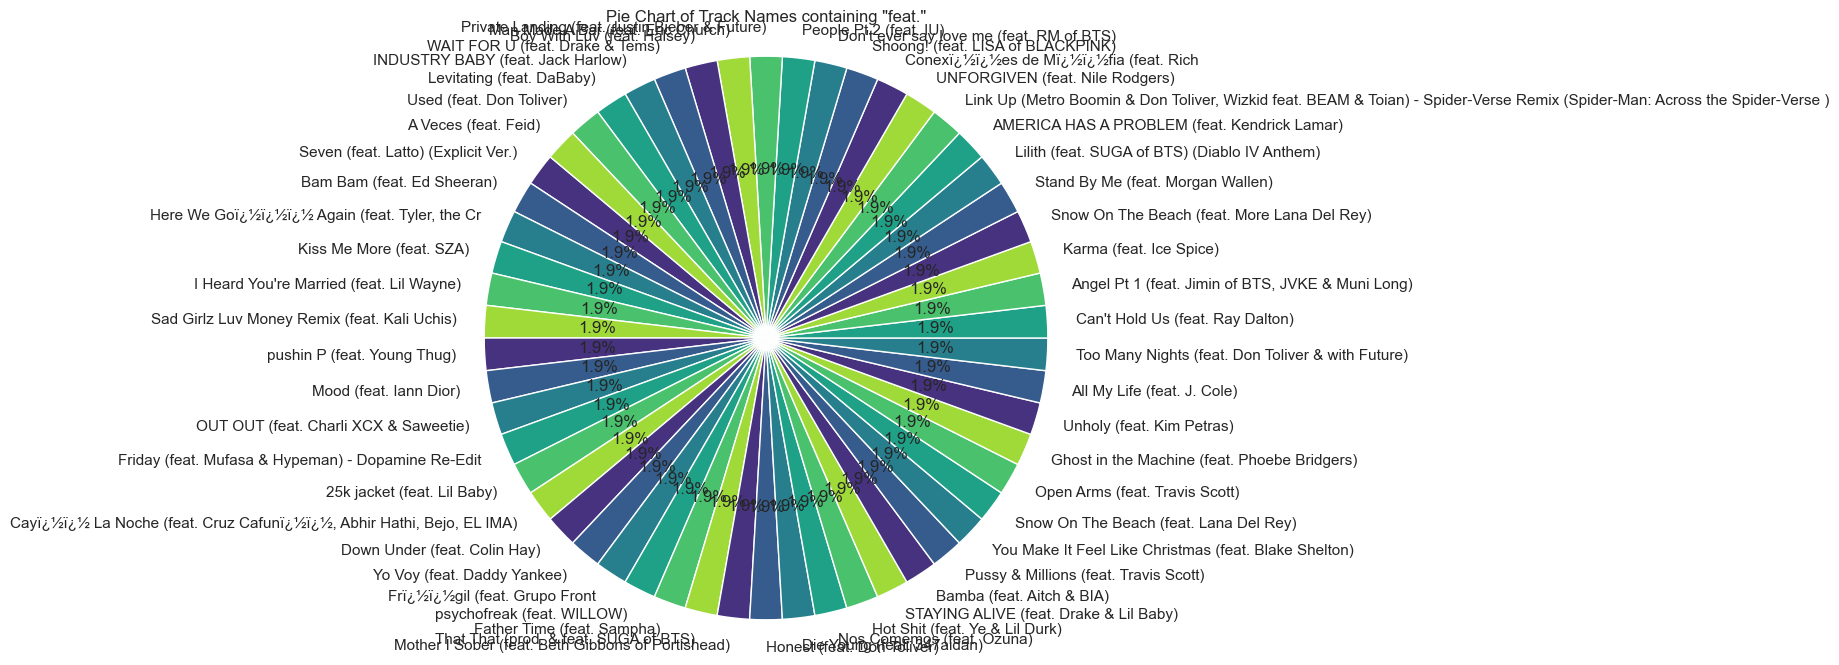

In [104]:
# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(track_counts.values, labels=track_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Track Names containing "feat."')
plt.axis('equal')
plt.show()


### Insights
1. The pie chart illustrates the distribution of track names that feature collaborations, indicated by the presence of "feat." in their titles.
2. By examining the proportions of different track names, one can identify artists who frequently collaborate with others, highlighting potential trends or preferences in collaborative music production.
3. The visualization underscores the significance of collaborations in contemporary music, reflecting the prevalence of joint projects and the potential influence on audience engagement and streaming patterns.

In [24]:
# Arranging the dataset according to the released year in ascending order
sptf.sort_values(by='released_year',ascending=True)

,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_percentage,valence_percentage,energy_percentage,acousticness_percetage,instrumentalness_percentage,liveness_percentage,speechiness_percentage
439,Agudo Mï¿½ï¿½gi,"Styrx, utku INC, Thezth",3,1930,1,1,323,0,90598517,4,...,130,F#,Minor,65,49,80,22,4,7,5
469,White Christmas,"Bing Crosby, John Scott Trotter & His Orchestr...",3,1942,1,1,11940,0,395591396,73,...,96,A,Major,23,19,25,91,0,40,3
460,The Christmas Song (Merry Christmas To You) - ...,Nat King Cole,1,1946,11,1,11500,0,389771964,140,...,139,C#,Major,36,22,15,84,0,11,4
466,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",2,1950,1,1,10585,0,473248298,126,...,143,D,Major,60,86,32,88,0,34,6
496,Jingle Bells - Remastered 1999,Frank Sinatra,1,1957,1,1,4326,0,178660459,32,...,175,G#,Major,51,94,34,73,0,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,Snow On The Beach (feat. More Lana Del Rey),"Lana Del Rey, Taylor Swift",2,2023,5,26,359,2,60350538,1,...,110,F#,Minor,66,32,40,81,0,11,3
220,Las Morras,"BLESSD, Peso Pluma",2,2023,4,4,291,8,127026613,8,...,133,A,Minor,78,90,84,31,0,7,4
218,Karma (feat. Ice Spice),"Taylor Swift, Ice Spice",2,2023,5,26,588,0,46142772,23,...,90,G#,Major,62,7,62,6,0,58,6
234,Niï¿½ï¿½a Bo,"Sean Paul, Feid",2,2023,4,21,1305,34,115010040,29,...,91,G,Major,82,47,62,10,0,10,15


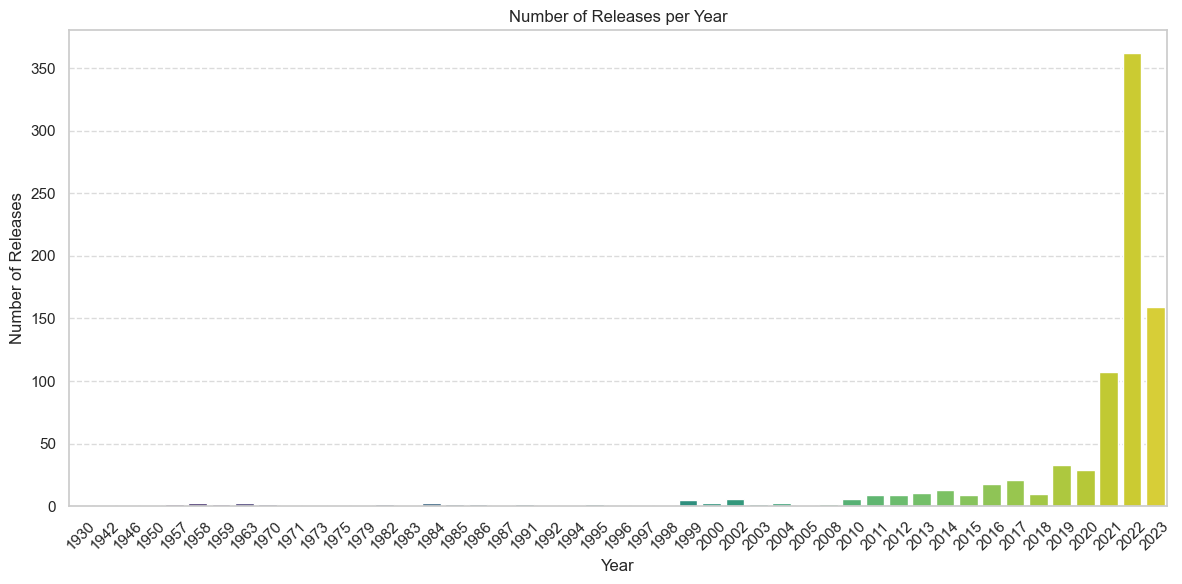

In [109]:
# Sort the DataFrame by 'released_year'
sorted_sptf = sptf.sort_values(by='released_year', ascending=True)

# Count the number of releases for each year
release_counts = sorted_sptf['released_year'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=release_counts.index, y=release_counts.values, palette='viridis')
plt.title('Number of Releases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Insights
1. Temporal Distribution: The graph illustrates the distribution of music releases over the years, providing an overview of how the volume of releases has evolved over time.
2. Trends in Music Production: By observing the fluctuations in the number of releases across different years, one can identify trends or patterns in music production, such as periods of growth, decline, or stability.
3. Artist Activity: The graph offers insights into the activity levels of artists and record labels, highlighting periods of prolific output or relative quietness in the music scene.
4. Predictive Insights: Analyzing the trajectory of releases over time can inform predictions about future music trends and anticipate potential shifts in the industry.

In [25]:
# song and their Track name with the highest acousticness, and speechiness greater than 1
sptf[(sptf['acousticness_percetage']>90)&(sptf['speechiness_percentage']>1)][['track_name']]

,track_name
128,lovely - Bonus Track
167,The Night We Met
349,Kahani Suno 2.0
416,Blind
445,It's Beginning To Look A Lot Like Christmas
448,Let It Snow! Let It Snow! Let It Snow!
469,White Christmas
587,Miserable Man
623,All of Me
691,Forever


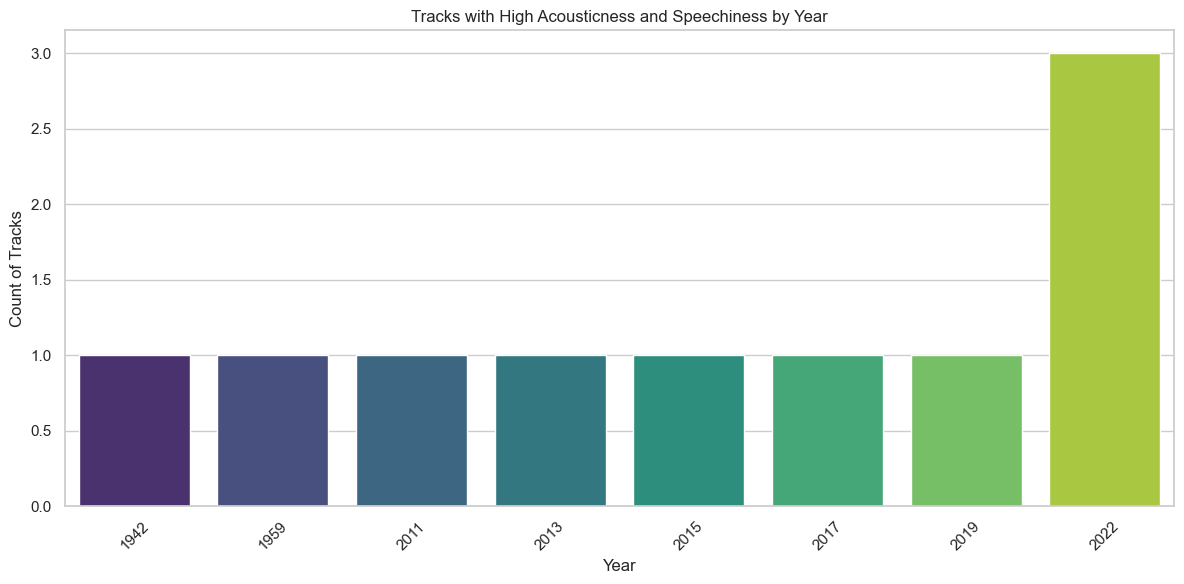

In [114]:
# Filter the DataFrame
filtered_tracks = sptf[(sptf['acousticness_percetage'] > 90) & (sptf['speechiness_percentage'] > 1)]

# Count the number of tracks for each category
track_counts = filtered_tracks.groupby('released_year')['track_name'].count().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='released_year', y='track_name', data=track_counts, palette='viridis')
plt.title('Tracks with High Acousticness and Speechiness by Year')
plt.xlabel('Year')
plt.ylabel('Count of Tracks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insights
1. The graph illustrates the distribution of tracks with high acousticness and speechiness across different years, providing insights into how these characteristics have varied over time.
2. By examining the heights of the bars for each year, one can identify years with a higher concentration of tracks exhibiting both high acousticness and speechiness, indicating potential trends or patterns in music production.
3. These insights provide a succinct overview of the distribution of tracks with high acousticness and speechiness by year, offering valuable observations about their temporal trends and potential implications in the music industry.

## Visiualization of dataset by plotting 

In [26]:
# Set the style for seaborn plots
sns.set(style="darkgrid")

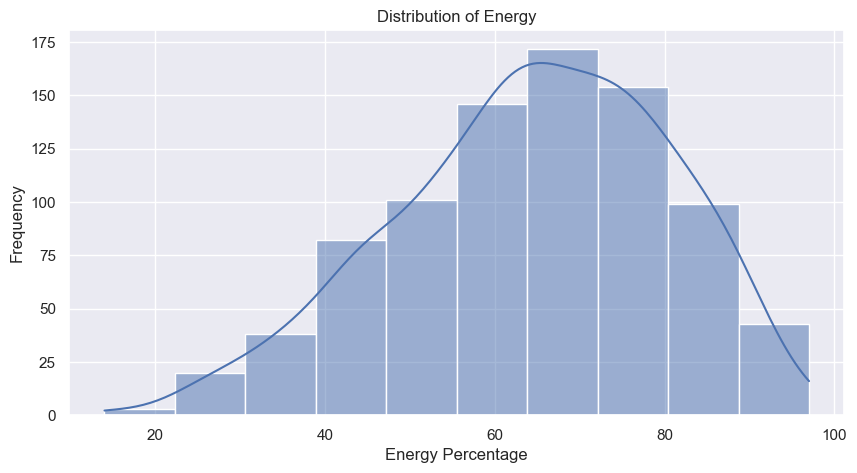

In [27]:
# Distribution of energy 
plt.figure(figsize=(10,5))
sns.histplot(sptf['energy_percentage'], bins=10, kde=True)
plt.title('Distribution of Energy')
plt.xlabel('Energy Percentage')
plt.ylabel('Frequency')
plt.show()

### Insights
The histogram provides insights into the central tendency of energy levels across the songs in the dataset. Understanding the most common energy percentage range helps identify typical energy levels present in the music.

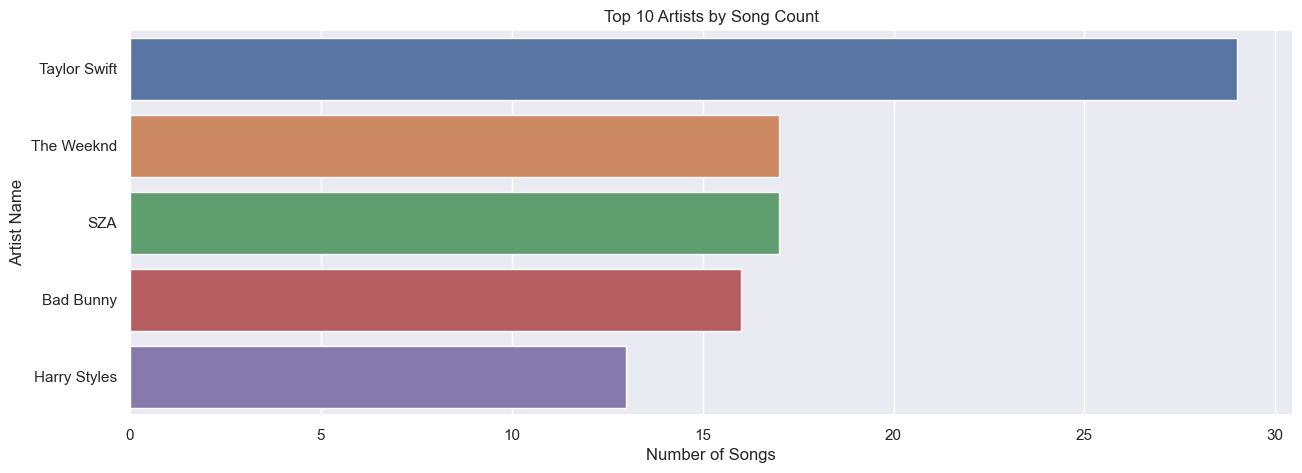

In [28]:
#  Countplot for the Top 10 Artists
top_artists = sptf['artist_name'].value_counts().head(5)
plt.figure(figsize=(15, 5))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='deep')
plt.title('Top 10 Artists by Song Count')
plt.xlabel('Number of Songs')
plt.ylabel('Artist Name')
plt.show()

### Insights
The visualization highlights the most prolific artists in the dataset, indicating the artists with the highest number of songs. This insight provides valuable information about the productivity and output of artists within the dataset.

In [29]:
#  Aggregate mean energy percentage for each artist
sptf.groupby('artist_name')['energy_percentage'].mean()


artist_name
(G)I-DLE                                         87.0
21 Savage, Gunna                                 73.0
24kgoldn, Iann Dior                              72.0
50 Cent                                          71.0
A$AP Rocky, Metro Boomin, Roisee                 53.0
                                                 ... 
j-hope                                           72.0
j-hope, J. Cole                                  82.0
sped up 8282                                     73.0
sped up nightcore, ARIZONATEARS, Lil Uzi Vert    90.0
teto                                             50.0
Name: energy_percentage, Length: 597, dtype: float64

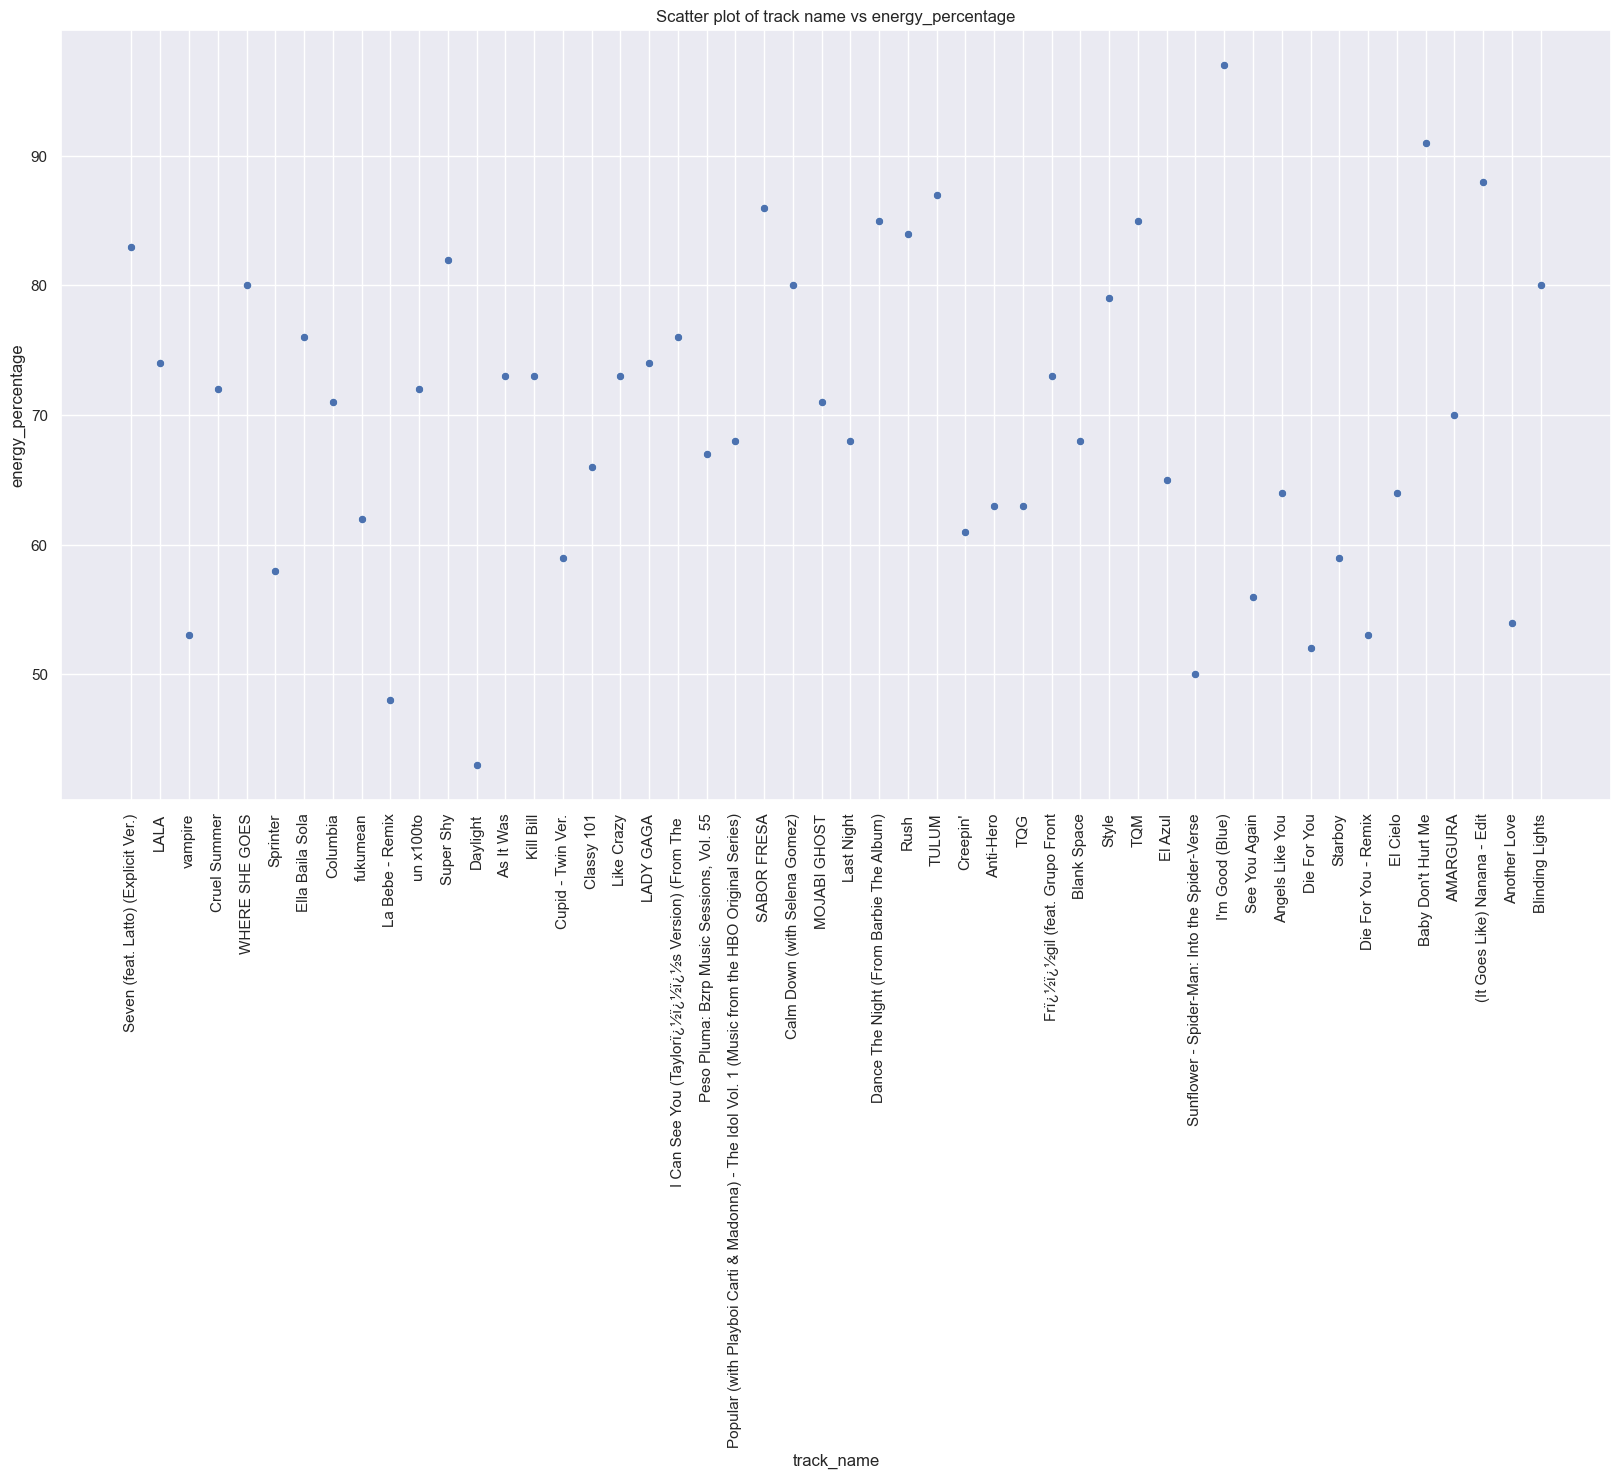

In [30]:
# Scatter plot of track name vs energy_percentage

plt.figure(figsize=(20,10))
sns.scatterplot(x='track_name', y='energy_percentage', data= sptf.head(50))
plt.title('Scatter plot of track name vs energy_percentage')
plt.xlabel('track_name')
plt.ylabel('energy_percentage')
plt.xticks(rotation=90)
plt.show()

### Insights
The visualization provides insights into the energy levels of songs produced by different artists. It allows for the identification of artists known for producing high-energy music versus those known for more mellow or subdued tracks.

In [31]:
sptf['track_name'].value_counts()

Take My Breath                            2
Die For You                               2
Let It Snow! Let It Snow! Let It Snow!    2
SPIT IN MY FACE!                          2
About Damn Time                           2
                                         ..
If We Ever Broke Up                       1
You Proof                                 1
LA INOCENTE                               1
Malas Decisiones                          1
Alone                                     1
Name: track_name, Length: 852, dtype: int64

In [36]:
sptf['released_year'].value_counts()

2022    362
2023    159
2021    107
2019     33
2020     29
2017     21
2016     18
2014     13
2013     11
2018     10
2012      9
2015      9
2011      9
2010      6
2002      6
1999      5
1963      3
1958      3
1984      3
2000      3
2004      3
1959      2
2008      2
1985      2
1982      2
1995      2
2003      2
1970      2
1991      2
1986      2
1957      2
1942      1
1996      1
2005      1
1979      1
1998      1
1950      1
1983      1
1946      1
1971      1
1992      1
1975      1
1994      1
1930      1
1973      1
1997      1
1987      1
Name: released_year, dtype: int64

In [41]:
if 'released_year' in sptf.index.names:
    sptf['released_year'] = sptf.index.get_level_values('released_year')
elif 'released_year' not in sptf.columns:
    raise ValueError("'released_year' is neither a column nor an index level in the DataFrame")

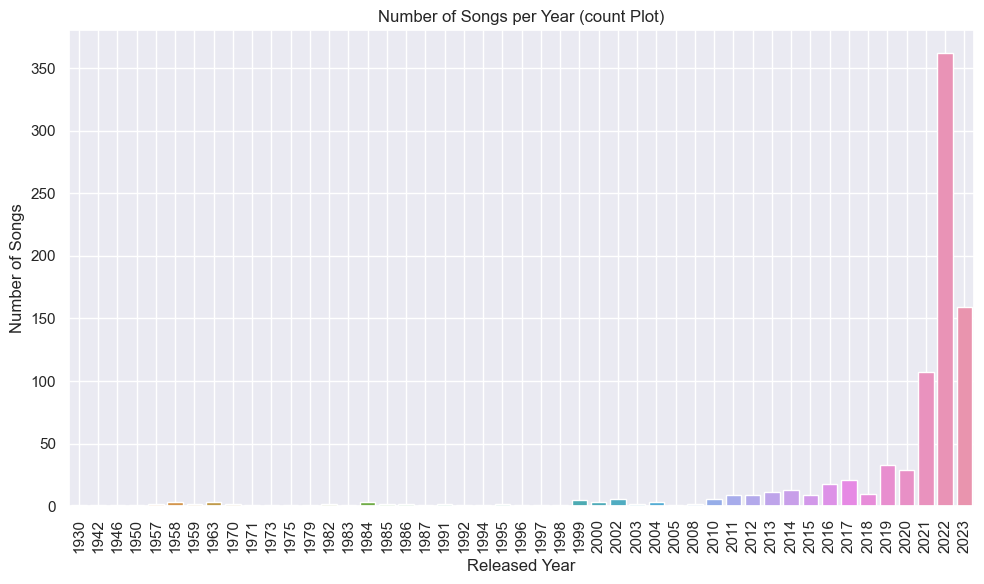

In [59]:
plt.figure(figsize=(10, 6))
sns.countplot(data=sptf, x='released_year')
plt.title("Number of Songs per Year (count Plot)")
plt.xlabel("Released Year")
plt.ylabel("Number of Songs")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

### Insights
The count plot of the number of songs per year provides a comprehensive overview of the temporal distribution of song releases over the years. This visualization highlights the dynamic nature of the music industry and offers valuable insights into trends, patterns, and shifts in music production.

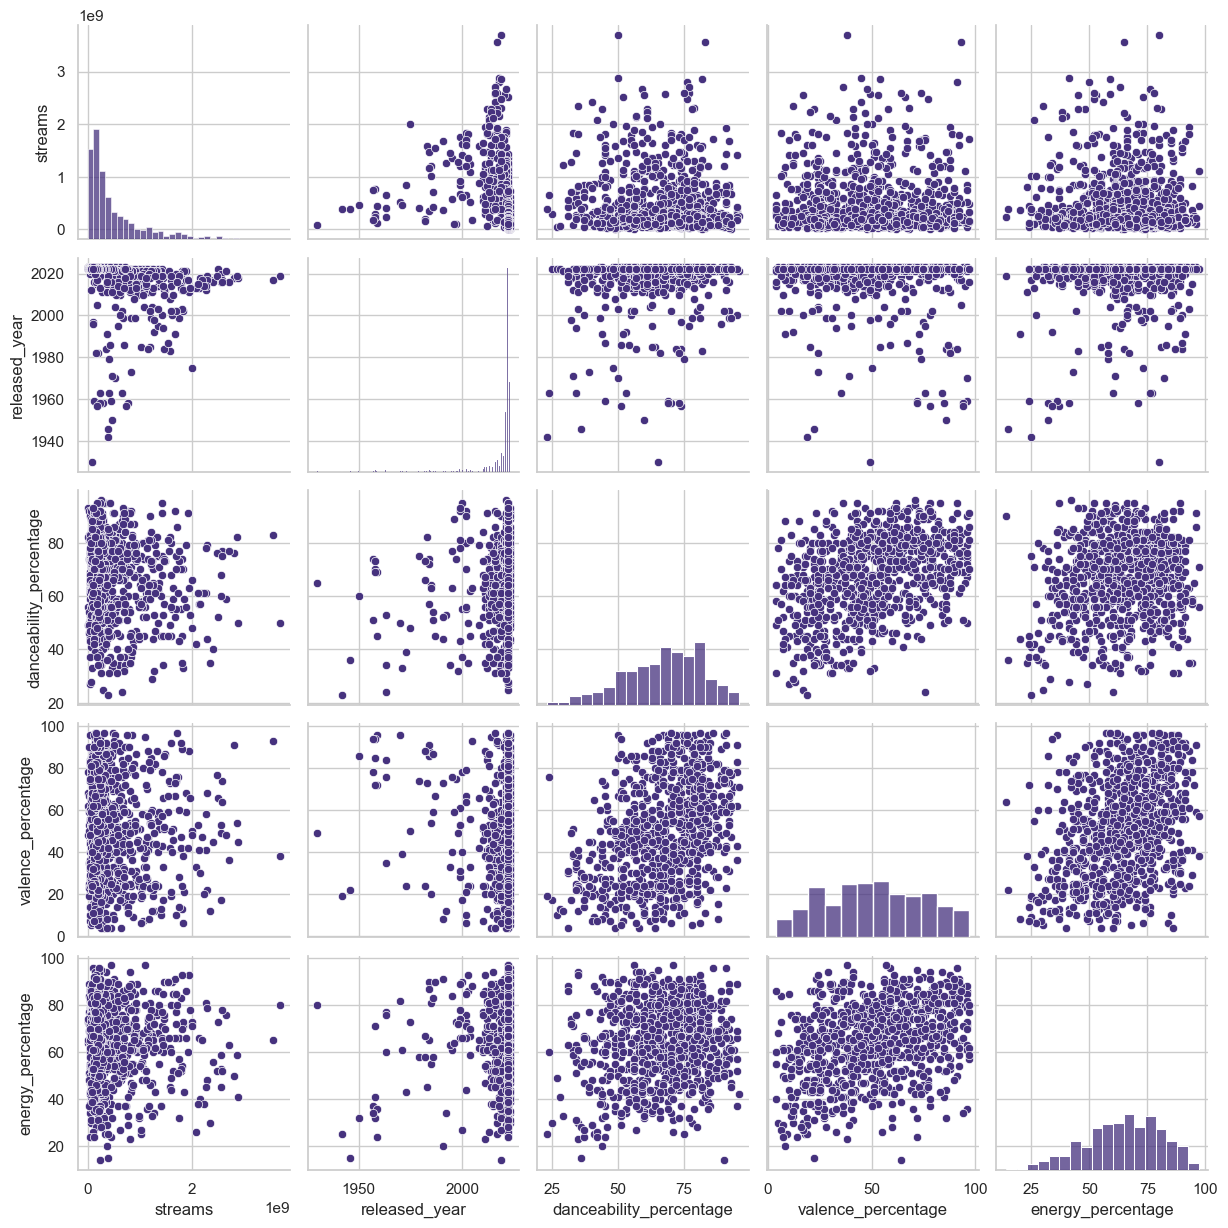

In [127]:
# Relationship between numerical features
sns.pairplot(sptf[['streams', 'released_year', 'danceability_percentage', 'valence_percentage', 'energy_percentage']])
plt.show()

### Insights

1. Streams' exhibit a generally increasing trend over the years, indicating a potential rise in music consumption.
2. Higher values of 'danceability_percentage', 'valence_percentage', and 'energy_percentage' correlate with increased stream counts, suggesting upbeat and energetic songs are favored by listeners.
3. The uniform distribution of features across different ranges suggests consistent data quality and measurement standards.

Text(0.5, 1.0, ' energy_percentage vs acousticness')

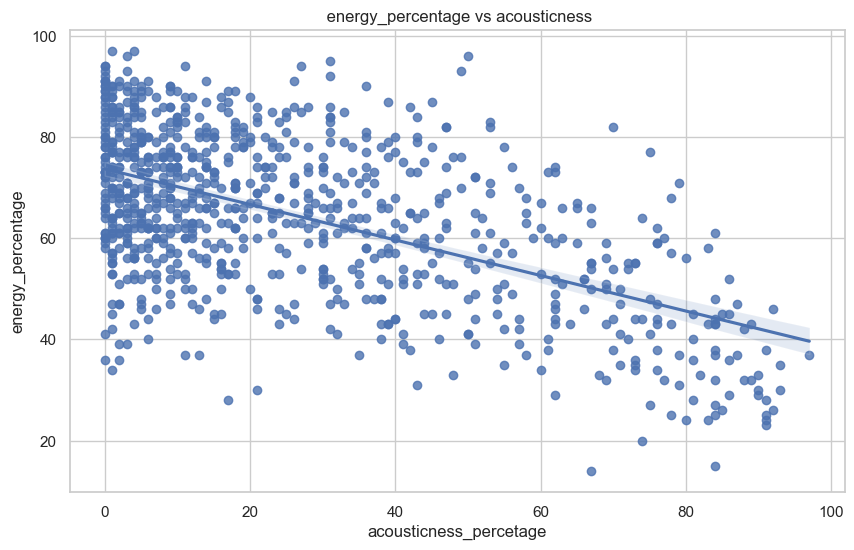

In [130]:
plt.figure(figsize=(10,6))
sns.regplot(data = sptf, x= "acousticness_percetage", y = "energy_percentage", color = "b")
plt.title(" energy_percentage vs acousticness")

### Insights
The regression plot indicates a negative correlation between acousticness and energy percentages. As the acousticness percentage increases, the energy percentage tends to decrease. This suggests an inverse relationship between acousticness and energy in the songs.

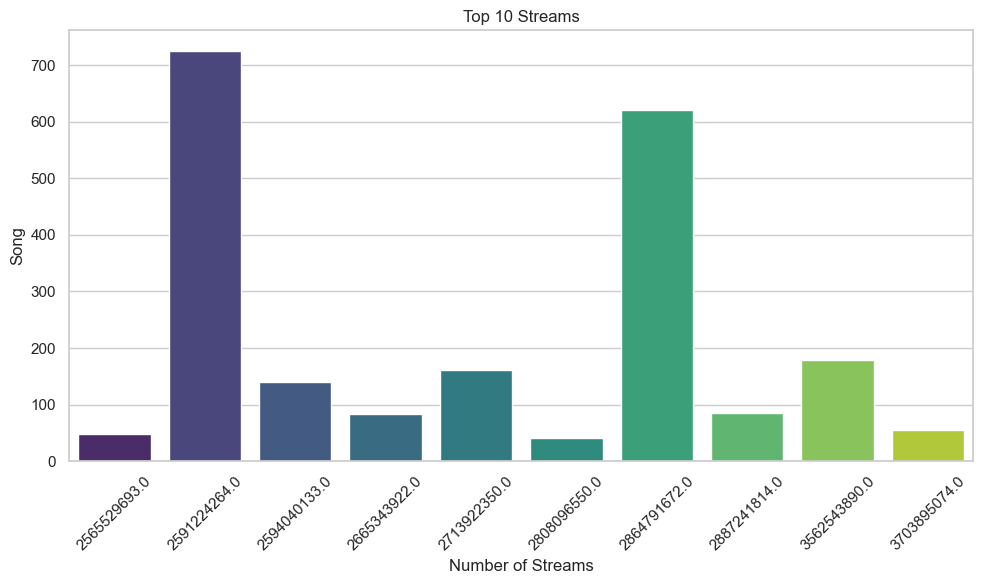

In [126]:
# Convert 'streams' column to numerical dtype
sptf['streams'] = pd.to_numeric(sptf['streams'], errors='coerce')

# Drop rows with missing stream values, if any
sptf.dropna(subset=['streams'], inplace=True)

# Select top 10 streams
top_streams = sptf['streams'].nlargest(10)

# Plot the top 10 streams
plt.figure(figsize=(10, 6))
sns.barplot(x=top_streams.values, y=top_streams.index, palette='viridis')
plt.title('Top 10 Streams')
plt.xlabel('Number of Streams')
plt.ylabel('Song')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insights
1. Popular Songs: The graph showcases the top 10 songs with the highest number of streams, providing valuable insight into the most popular tracks among listeners.
2. Dominant Tracks: Certain songs stand out with significantly higher stream counts compared to others, indicating their dominance or widespread appeal in the music streaming platform.
3. Audience Preferences: Analyzing the characteristics of these top-streamed songs can provide insights into audience preferences, helping in the identification of trends and genres that resonate most with listeners.

In [62]:
sptf['artist_name'].value_counts().head(10)

Taylor Swift      29
The Weeknd        17
SZA               17
Bad Bunny         16
Harry Styles      13
Kendrick Lamar    12
Ed Sheeran         9
Morgan Wallen      9
BTS                8
Feid               8
Name: artist_name, dtype: int64

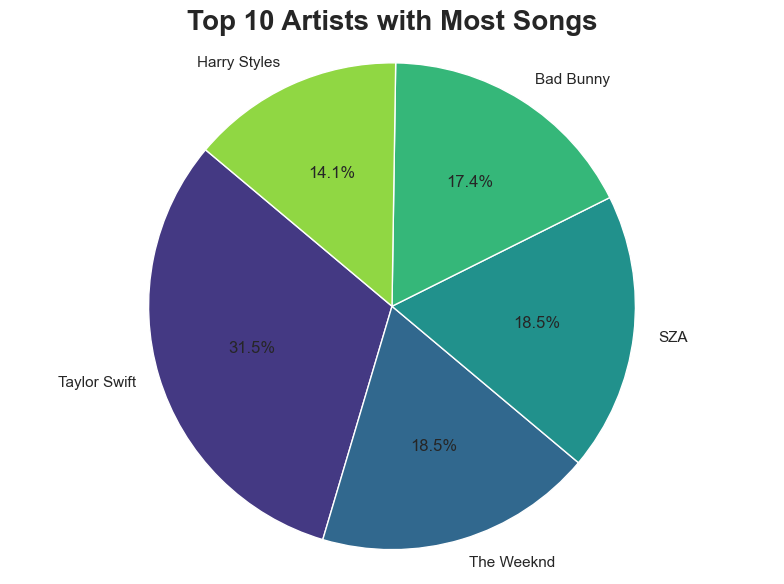

In [70]:
plt.figure(figsize=(8, 6))
plt.pie(top_artists.values, labels=top_artists.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(top_artists)))
plt.title('Top 10 Artists with Most Songs', fontsize=20, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

###  Insights
The analysis revealed the artists who have contributed the most songs to the dataset. These artists emerge as key figures within the music industry, showcasing their prolificacy and longevity in creating music.

# CONCLUSION


Conclusion: Insights from Music Dataset Analysis

Through visualizations of the music dataset, I've unearthed valuable insights into the dynamics of the music industry, artist productivity, and audience preferences.

Temporal Trends: Analysis of song releases over time revealed fluctuations in music production, reflecting industry trends and cultural shifts.

Energy Characteristics: Examination of energy distributions provided a nuanced understanding of the diverse energy levels present in the music, influencing listener experiences and genre classifications.

Top Artists: Identification of prolific artists shed light on influential figures within the dataset, highlighting their impact on genre representation and audience engagement.

These insights offer valuable perspectives for industry stakeholders, marketers, and music enthusiasts, informing strategic decision-making and creative endeavors in the ever-evolving landscape of the music industry.